## Múltiples canales de entrada y salida

<h3>Objetivo de este cuaderno<h3>
<h5> 1. Aprender sobre múltiples canales de entrada y múltiples canales de salida.</h5>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

C:\Users\Josue Santana Robled\AppData\Local\Temp\ipykernel_21044\3053585304.py:5: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import ndimage, misc


### Canales de multiples salidas

En **PyTorch**, puedes crear un objeto <code>Conv2d</code> con **múltiples salidas**. Para cada canal, **se crea un kernel**, y cada kernel **realiza una convolución de forma independiente**. Como resultado, **el número de salidas es igual al número de canales**.

Esto se demuestra en la siguiente figura: el número **9** se **convoluciona con tres kernels**, cada uno de **un color diferente**. Como resultado, hay **tres mapas de activación distintos**, representados por **diferentes colores**.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2activationmaps.png" width="750," align="center">

Simbólicamente, esto se puede **representar de la siguiente manera:**


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2activationmap2.png" width="500," align="center">

Crea un **Conv2d** con 3 canales

In [2]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

PyTorch asigna valores aleatorios a cada kernel. Sin embargo, aquí utilizaremos kernels que han sido diseñados para detectar bordes.


In [3]:
Gx = torch.tensor([[1.0, 0, -1.0], [2.0, 0, -2.0], [1.0, 0.0, -1.0]])
Gy = torch.tensor([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

conv1.state_dict()['weight'][0][0] = Gx
conv1.state_dict()['weight'][1][0] = Gy
conv1.state_dict()['weight'][2][0] = torch.ones(3, 3)

Cada kernel tiene su propio bias (sesgo), así que los estableceremos todos en cero.


In [4]:
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

Imprime cada kernel.

In [5]:
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


Crea una **imagen de entrada** <code>image</code> para representar la **entrada X**.


In [6]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

Graficalo como una imágen

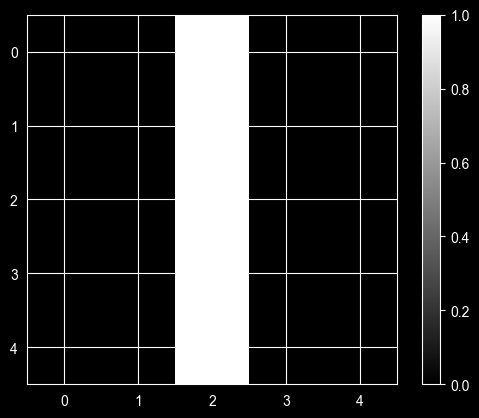

In [7]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

Realiza la convolución utilizando cada canal.


In [8]:
out=conv1(image)

El resultado es un tensor de 1×3×3×3. Esto representa una muestra con tres canales, y cada canal contiene una imagen de 3×3.

Las mismas reglas que determinan la forma de cada imagen se discutieron en la sección anterior.


In [9]:
out.shape

torch.Size([1, 3, 3, 3])

Imprime cada canal como un tensor o como una imagen.

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


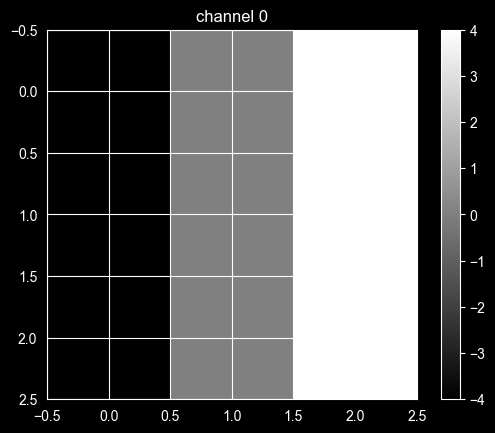

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


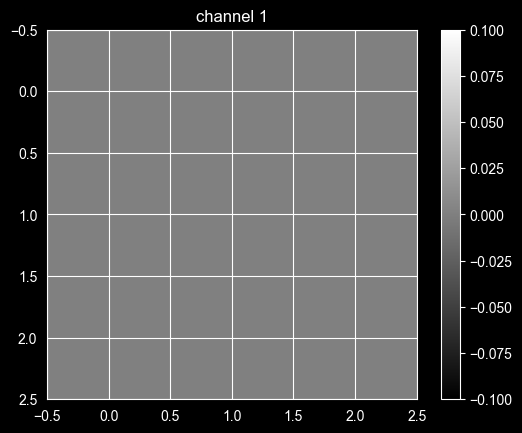

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


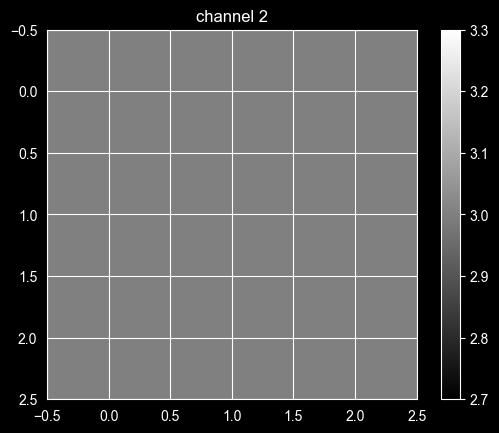

In [10]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Se pueden utilizar diferentes kernels para detectar diversas características en una imagen. Puedes observar que el primer canal fluctúa, mientras que los otros dos canales producen un valor constante.

La siguiente figura resume el proceso.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2outputsgray.png" width="750," align="center">

Si utilizas una imagen diferente, el resultado será distinto.

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


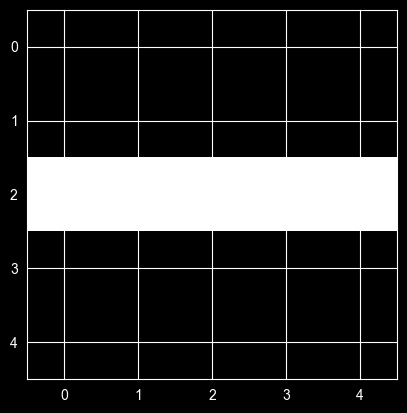

In [11]:
image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

En este caso, el segundo canal fluctúa, mientras que el primero y el tercero producen un valor constante.


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


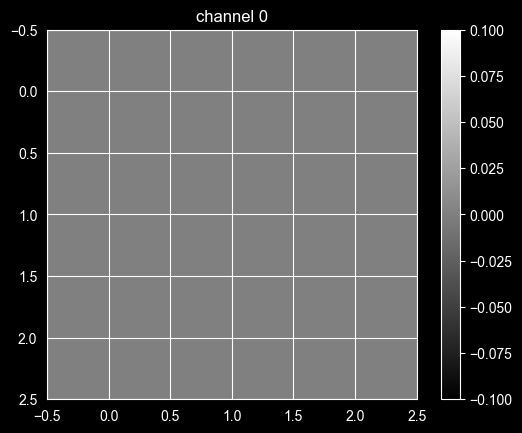

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


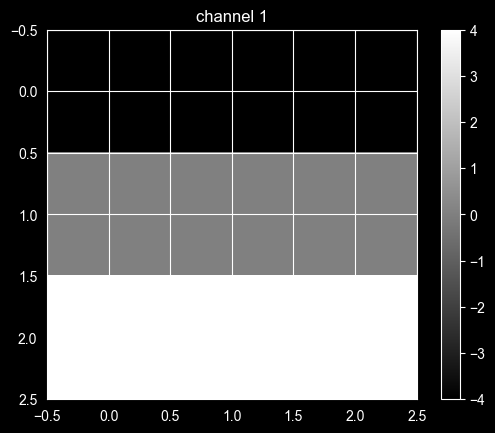

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


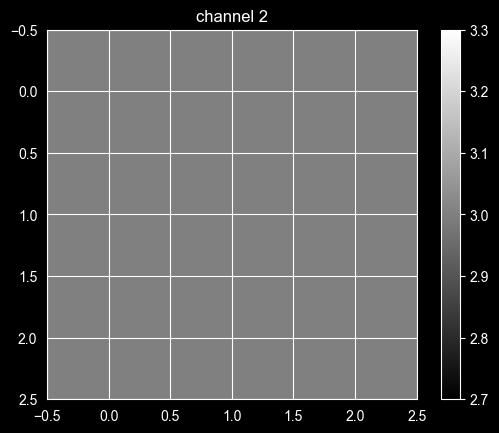

In [12]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

La siguiente figura resume el proceso:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2ouputsgray2.png" width="750," align="center">

### Canales de multiples entradas

Para dos entradas, puedes crear dos kernels. Cada kernel realiza una convolución sobre su canal de entrada asociado. Luego, las salidas resultantes se suman, como se muestra:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.22chanalsinput.png" width="750," align="center">

Crea una entrada con dos canales:

In [14]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

Imprime cada imágen

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


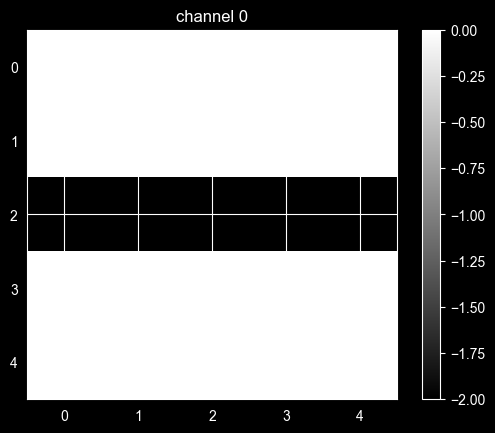

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


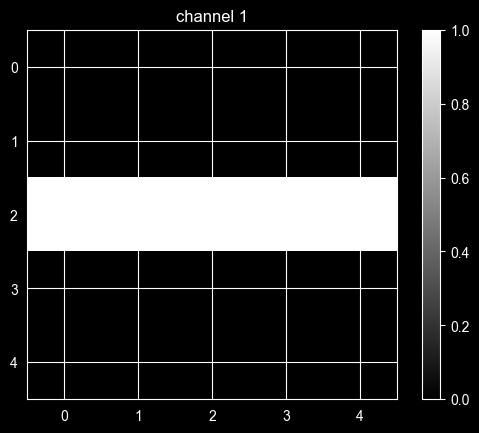

In [15]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Crea un objeto <code>Conv2d</code> con dos entradas

In [17]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)

Asigna valores a los kernels para hacer los cálculos un poco más sencillos.


In [18]:
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

In [19]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

Realiza la convolución utilizando cada canal.

In [20]:
conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

Las siguientes imagenes resumen el proceso. El objeto realiza la Convolución.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_two_channal_example.png" width="750," align="center">

Entonces, añade el resultado:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_two_channal_example2.png" width="750," align="center">

<h2>Múltiples canales de entrada y múltiples canales de salida</h2>


Cuando se utilizan múltiples entradas y múltiples salidas, se crea un kernel para cada entrada, y el proceso se repite para cada salida. El proceso se resume en la siguiente imagen.

Hay dos canales de entrada y tres canales de salida. Para cada canal, la entrada en rojo y morado se convoluciona con un kernel individual, cada uno con un color diferente. Como resultado, se obtienen tres salidas.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2mulit_input_output.png" width="750," align="center">

Crea un ejemplo con dos entradas y tres salidas y asigna valores a los kernels para hacer los cálculos un poco más sencillos.


In [21]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

Para cada salida, hay un sesgo (bias)**, así que establece todos en cero.


In [22]:
conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

Crea una imagen de dos canales y grafica los resultados.


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


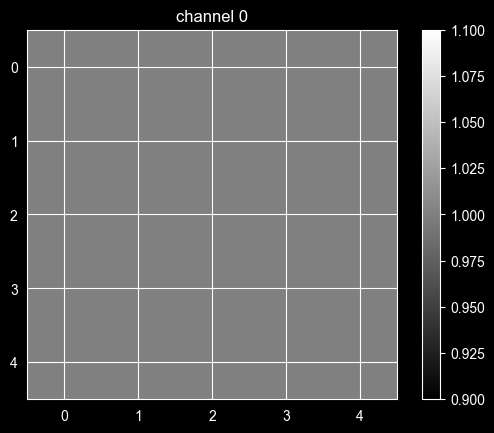

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


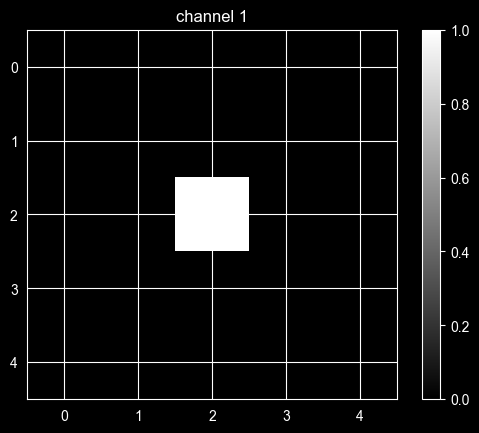

In [23]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Realiza la convolución.


In [24]:
z=conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

La salida del primer canal esta dada por:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_1.png" width="750," align="center">

La salida del segundo canal esta dado por:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_2.png" width="750," align="center">

La salida del tercer canal esta dado por:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_3.png" width="750," align="center">

<h2>Preguntas de Prácticas </h2>

Utiliza los siguientes dos objetos de convolución** para producir el mismo resultado que una convolución con dos canales de entrada sobre imageA e imageB, como se muestra en la siguiente imagen.


In [25]:
imageA=torch.zeros(1,1,5,5)
imageB=torch.zeros(1,1,5,5)
imageA[0,0,2,:]=-2
imageB[0,0,2,:]=1


conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv6 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv5.state_dict()['weight'][0][0]=1*Gx1
conv6.state_dict()['weight'][0][0]=-2*Gx1
conv5.state_dict()['bias'][:]=torch.tensor([0.0])
conv6.state_dict()['bias'][:]=torch.tensor([0.0])

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2Practice%20Questions_1.png" width="750," align="center">

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2Practice%20Questions_2.png" width="750," align="center">

In [26]:
conv5(imageA)+conv6(imageB)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<AddBackward0>)